In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
ctg = ['musicality', 'note accuracy', 'rhythmic accuracy', 'tone quality']

In [2]:
def loadMatFile(name):
    matfile = sio.loadmat(name)
    return matfile['AccuList'], matfile['NewList']

In [3]:
acculist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[0] for i in np.arange(1,4)]
newlist_sr = [loadMatFile(str(i) + 'forward_fullset_sr')[1] for i in np.arange(1,4)]
acculist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[0] for i in np.arange(1,4)]
newlist_tech = [loadMatFile(str(i) + 'forward_fullset_tech')[1] for i in np.arange(1,4)]

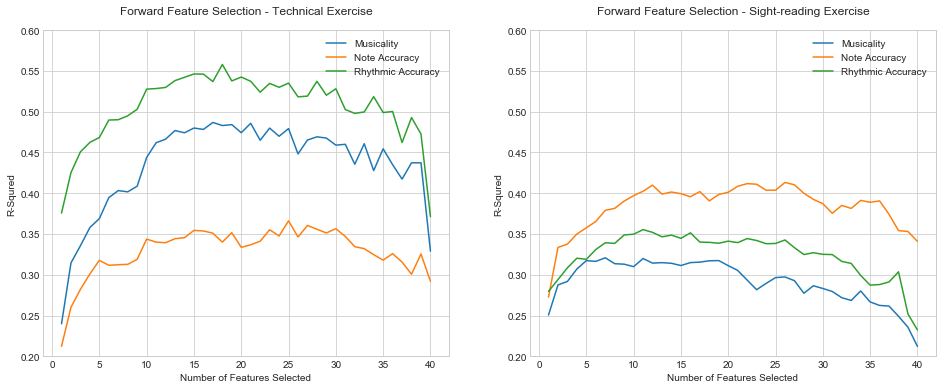

In [95]:
category = np.arange(1,4)
fig = plt.figure(figsize=(16,6))
# tech
plt.subplot(1,2,1)
for i in category:
    plt.plot(np.arange(1,41), acculist_tech[i-1].flatten())
plt.ylabel('R-Squred')
plt.ylim([0.2, 0.6])
plt.xlabel('Number of Features Selected')
plt.title('Forward Feature Selection - Technical Exercise', y = 1.03)
plt.legend(['Musicality', 'Note Accuracy', 'Rhythmic Accuracy'])

plt.subplot(1,2,2)
for i in category:
    plt.plot(np.arange(1,41), acculist_sr[i-1].flatten())
plt.ylabel('R-Squred')
plt.ylim([0.2, 0.6])
plt.xlabel('Number of Features Selected')
plt.title('Forward Feature Selection - Sight-reading Exercise', y = 1.03)
plt.legend(['Musicality', 'Note Accuracy', 'Rhythmic Accuracy'])

In [13]:
def compareCategories(featureGroup, category = None):
    # plot the accuracy curve and the order of features in featureGroup (4 categories)
    # featureGroup: index of features in a group
    fig = plt.figure(figsize=(18,24))
    if category == None:
        category = np.arange(1,5)
    for i in category:
        I = np.argsort(newlist_tech[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i-1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,41), acculist_tech[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([10,10], [0,0.6],'-r')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])
        
        I = np.argsort(newlist_sr[i-1].flatten())
        p_feature = I[featureGroup-1]+1
        
        plt.subplot(4,2,2*i)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,41), acculist_sr[i-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([10,10], [0,0.6],'-r')
        plt.ylim([0, 0.6])
        plt.ylabel('RSQ')
        plt.title(ctg[i-1])

    plt.show()

In [14]:
def compareGroups(ctgIdx, featureGroups, groupName):
    # plot the accuracy curve and the order of features in featureGroup
    # sight-reading/technical, one category, compare among groups
    # newlist: a list of feature idx, order in feature selection (4 category)
    # acculist: corresponding accuracy (Rsq) (4 category)
    # featureGroups: a list of feature groups
    groupNum = len(featureGroups)
    fig = plt.figure(figsize=(18,5*groupNum))
    for i in np.arange(groupNum):
        I = np.argsort(newlist_tech[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+1)
        # plot the accuracy: technical
        plt.plot(np.arange(1,41), acculist_tech[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([10,10], [0,0.6],'-r')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])
        
        I = np.argsort(newlist_sr[ctgIdx-1].flatten())
        p_feature = I[featureGroups[i]-1]+1
        
        plt.subplot(groupNum, 2, 2*i+2)
        # plot the accuracy: sight-reading
        plt.plot(np.arange(1,41), acculist_sr[ctgIdx-1].flatten())
        # plot the positions of features in featureGroup
        plt.plot(p_feature, np.zeros_like(p_feature) + 0.2, 'x')
        plt.plot([10,10], [0,0.6],'-r')
        plt.ylabel('RSQ')
        plt.ylim([0, 0.6])
        plt.title(groupName[i])

    plt.show()

In [6]:
# Left: Technical Exercise
# Right: Sight-reading exercise

In [63]:
# feature groups
# std, nonscore, score
feature_Npitch1 = np.arange(0, 4)+1
feature_Spitch1 = np.arange(4, 8)+1
feature_Spitch2 = np.arange(8, 12)+1

feature_pitch = np.arange(0, 12)+1

feature_Ndyn1 = np.arange(12, 16)+1
feature_Ndyn2 = np.arange(16, 20)+1

feature_dyn = np.arange(12, 20)+1

feature_Nioi = np.arange(20, 26)+1
feature_Sioi = np.arange(26, 32)+1

feature_ioi = np.arange(20, 32)+1

feature_dtw = np.arange(32, 36)+1
feature_jump = np.arange(36, 38)+1
feature_nlr4 = np.arange(38, 40)+1

feature_dtwDrv = np.arange(32, 40)+1

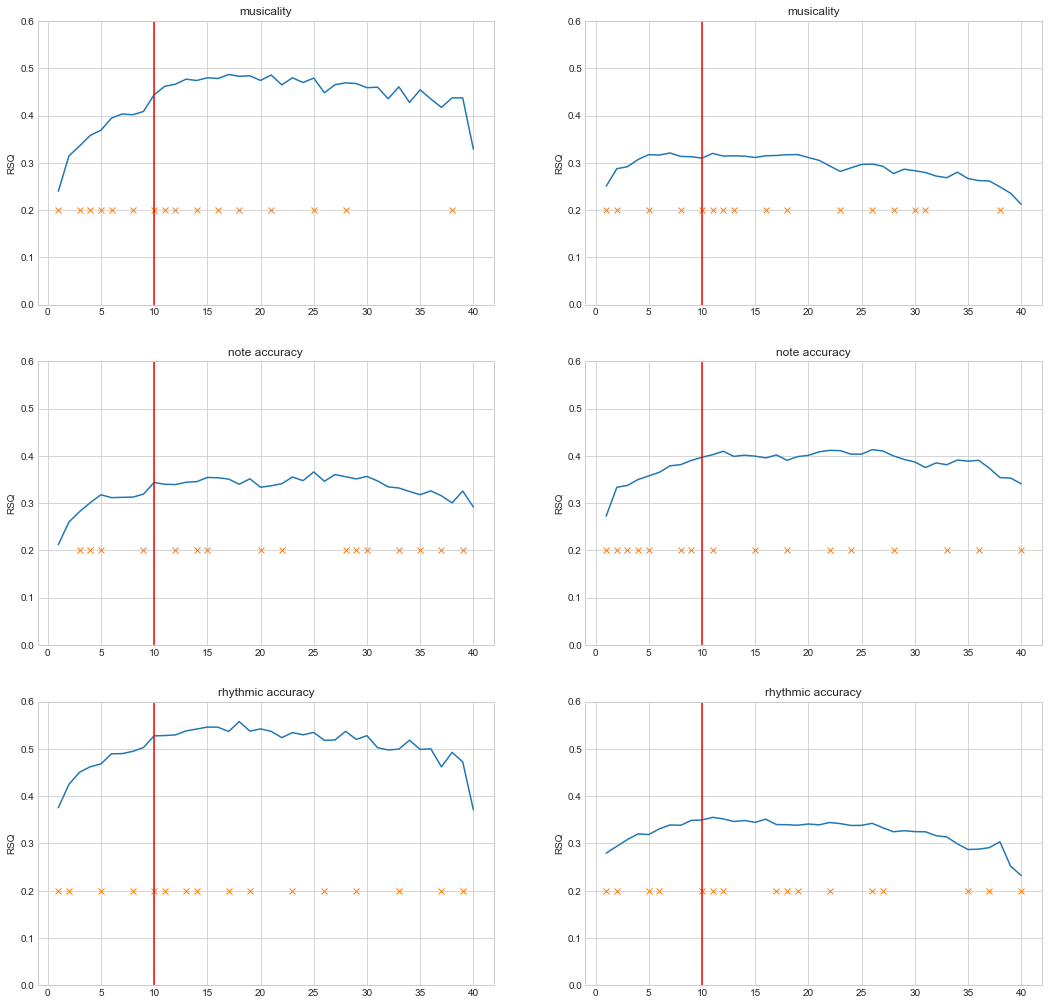

In [70]:
# 1
# compare the same group of feature among categories
compareCategories(np.concatenate([feature_pitch, feature_jump, feature_nlr4]),[1,2,3]) 
# pitch features affect rhythmic accuracy more in sight-reading
# students are not familiar with the score

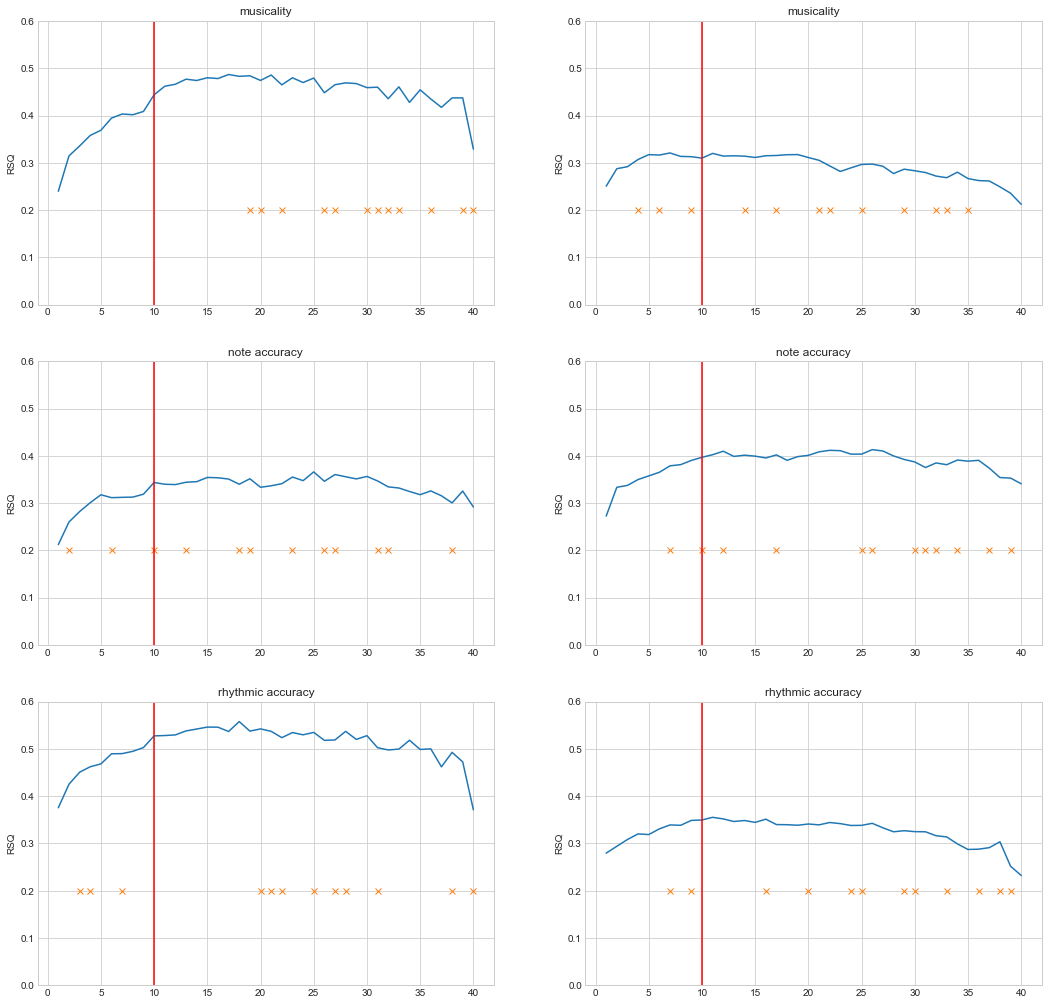

In [49]:
# 2.1
# compare the same group of feature among categories
compareCategories(feature_ioi, [1,2,3])
# musicality: not important to tech

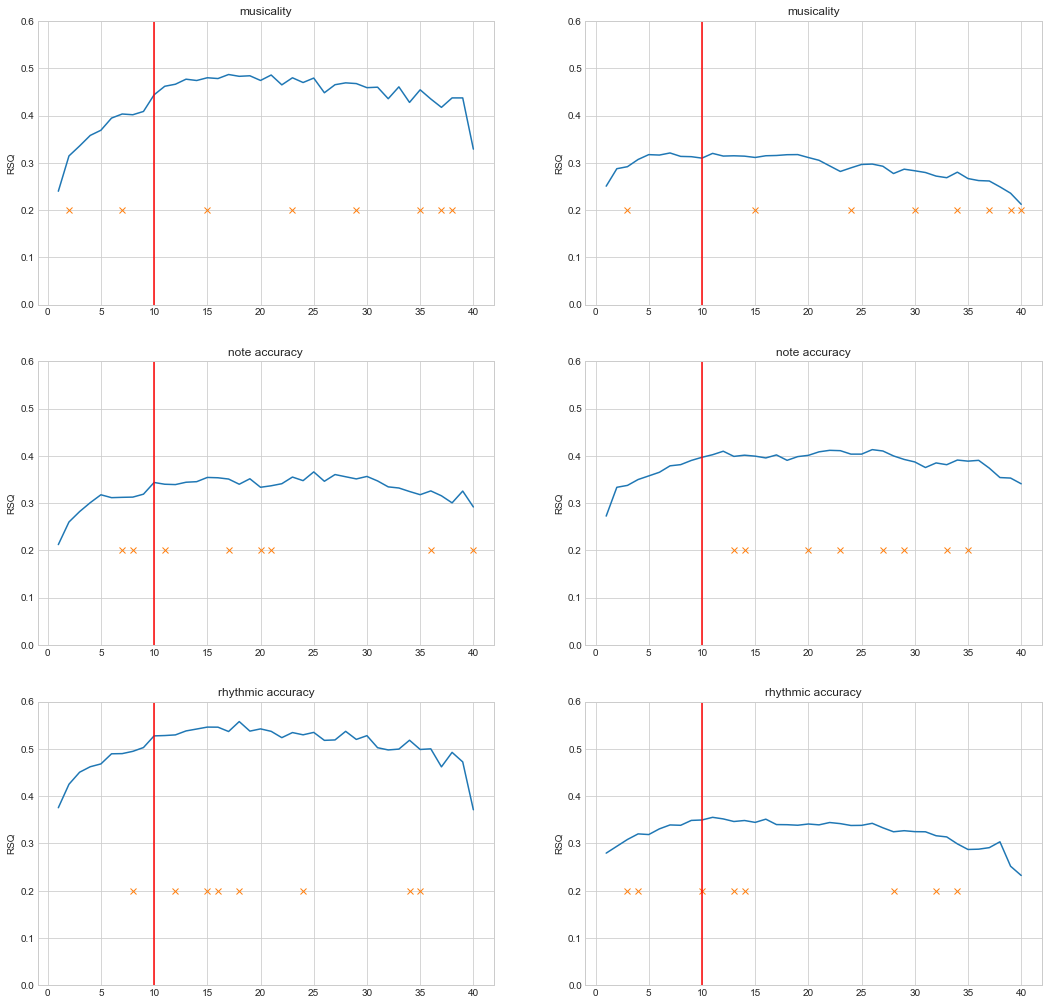

In [32]:
compareCategories(feature_dyn,[1,2,3]) 

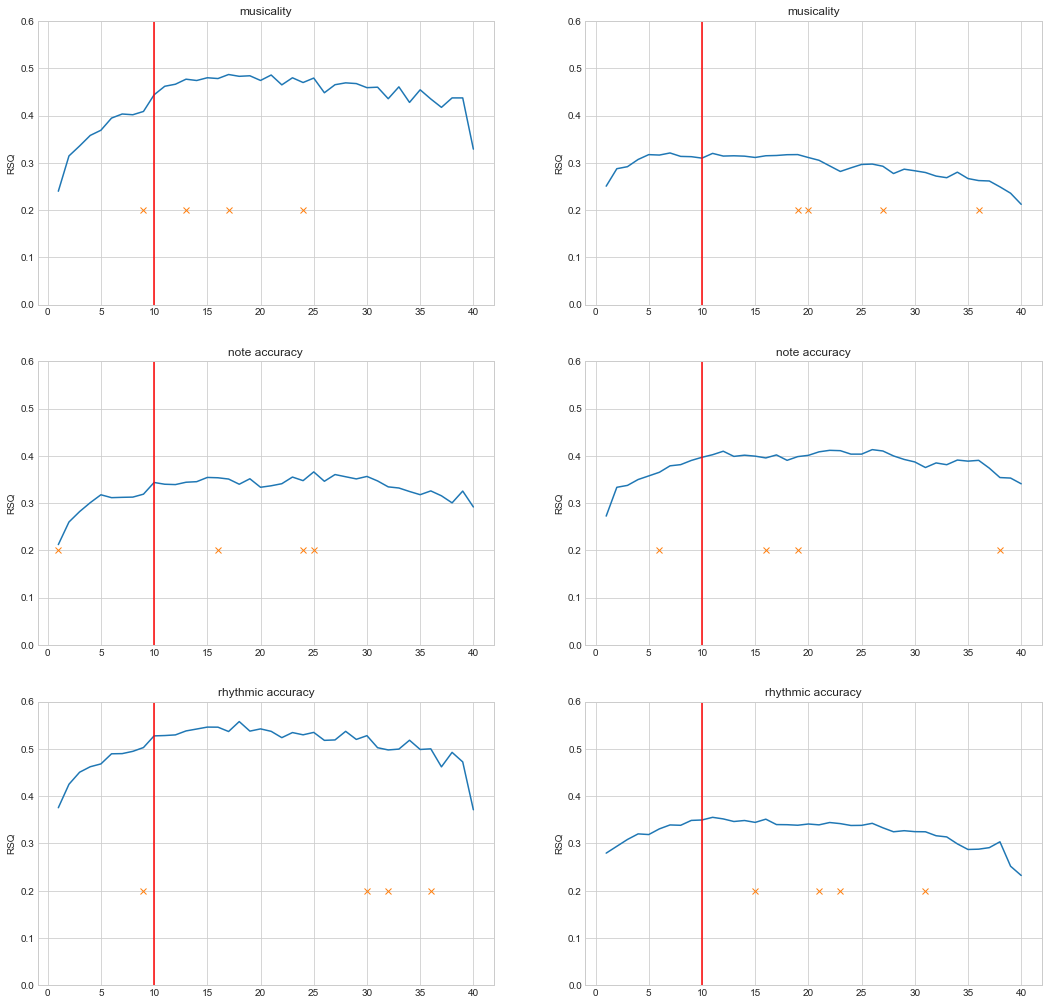

In [64]:
compareCategories(feature_dtw,[1,2,3]) 

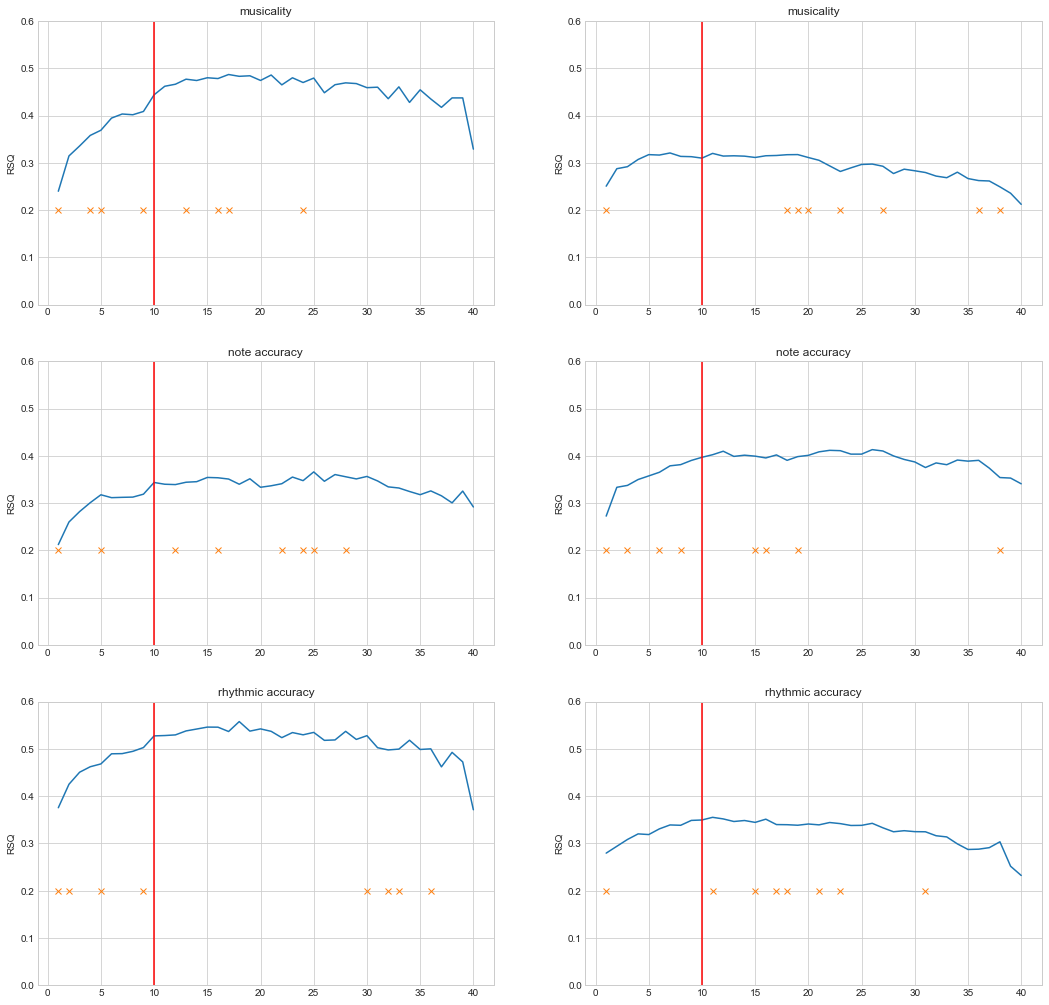

In [66]:
compareCategories(feature_dtwDrv,[1,2,3]) 

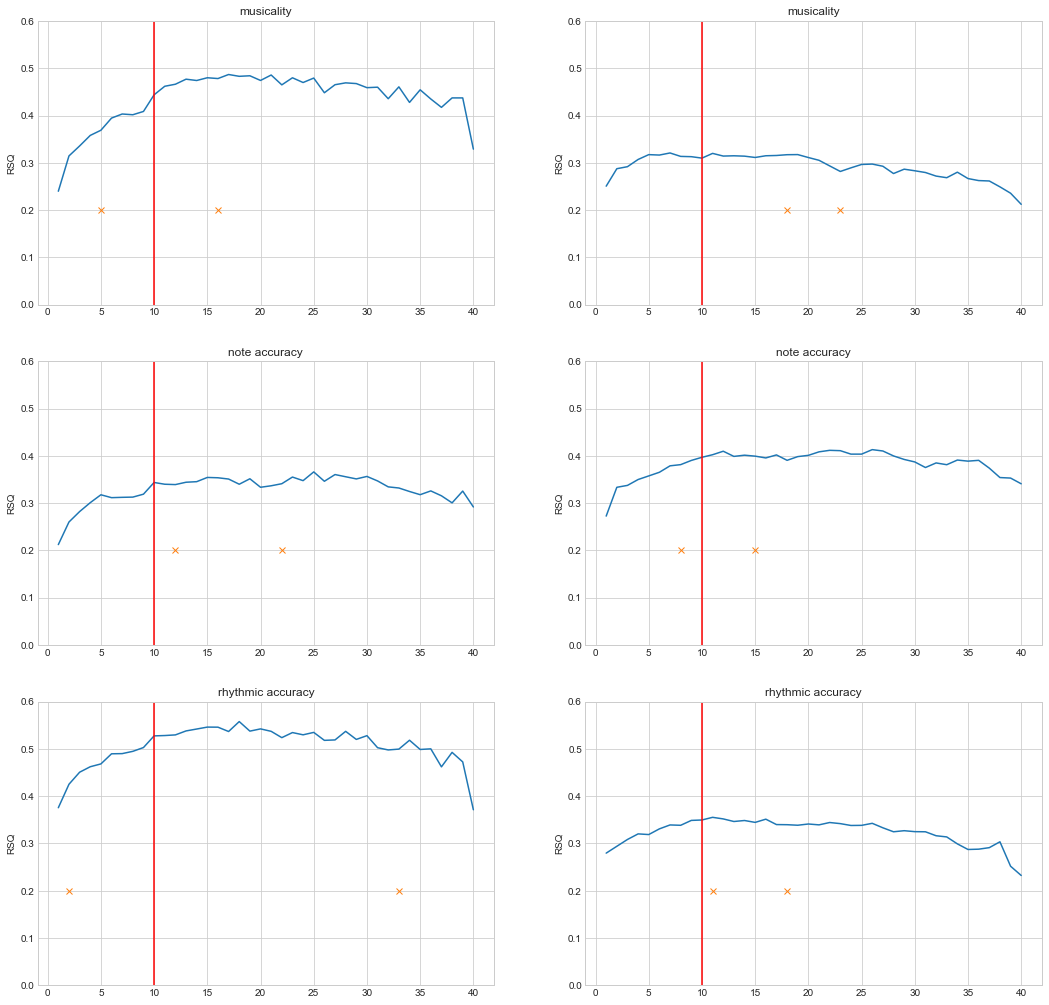

In [65]:
compareCategories(feature_jump,[1,2,3]) 

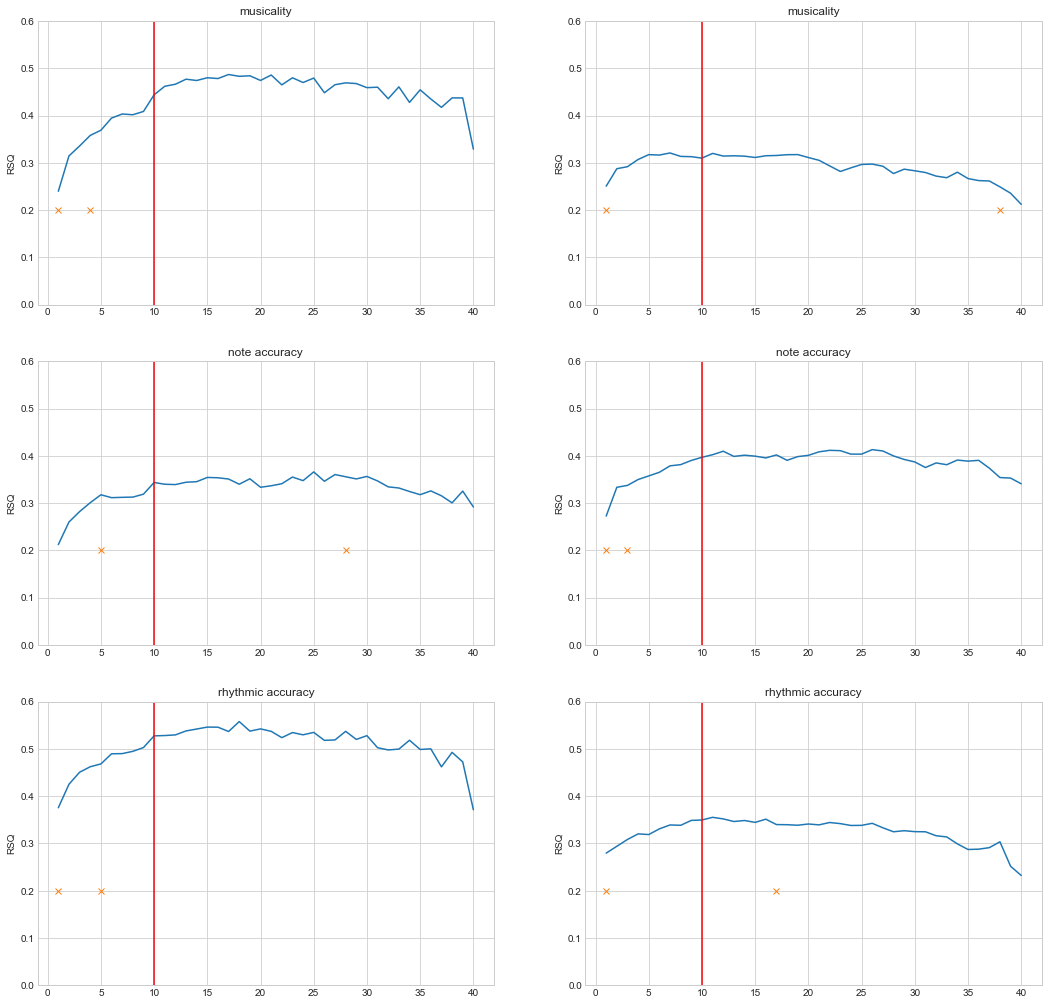

In [52]:
compareCategories(feature_nlr4,[1,2,3]) 

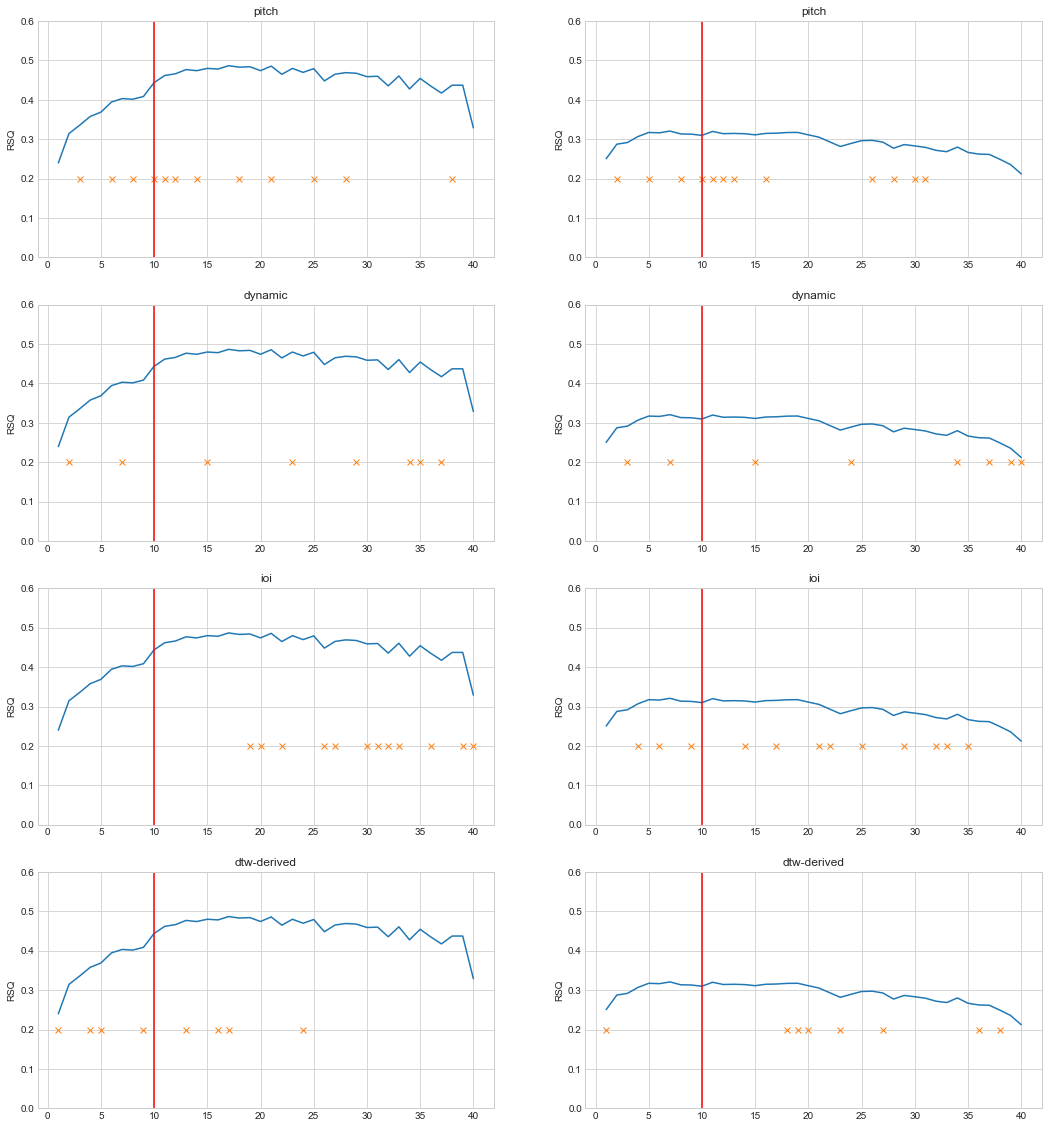

In [57]:
featureGroups = [feature_pitch, feature_dyn, feature_ioi, feature_dtwDrv]
groupNames = ['pitch', 'dynamic', 'ioi', 'dtw-derived']
compareGroups(1, featureGroups, groupNames)

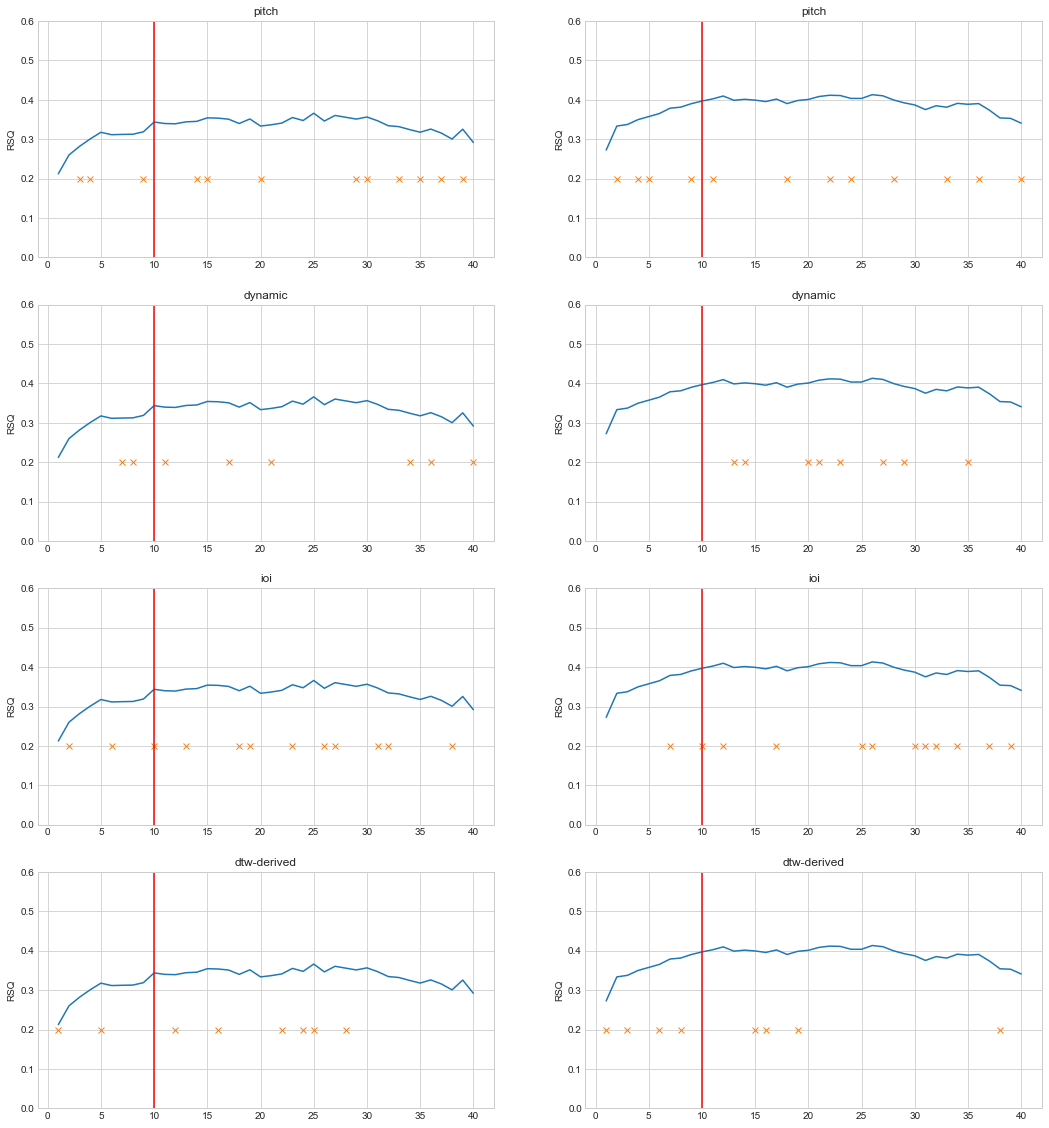

In [58]:
compareGroups(2, featureGroups, groupNames)

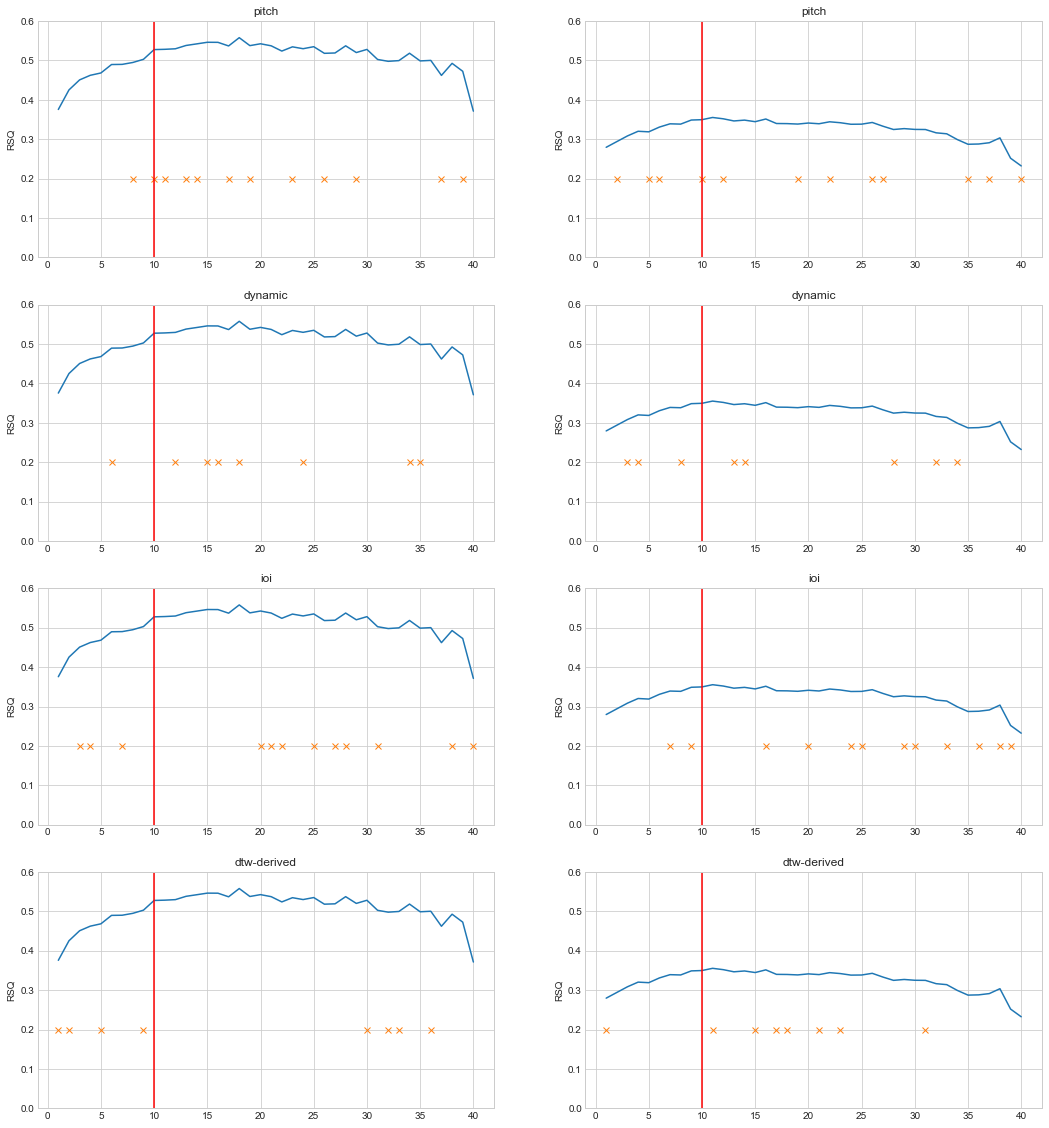

In [59]:
compareGroups(3, featureGroups, groupNames)